# CLASSIFYING GLASS DATASET using  K- NEAREST NEIGHBOR CLASSIFICATION ALGORITHM

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [2]:
glass=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
X=glass.iloc[:,:9]
Y=glass.iloc[:,9:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
norm_glass=MinMaxScaler()
norm= norm_glass.fit_transform(X)
norm_data=pd.DataFrame(norm,columns=X.columns)

In [8]:
report = sv.analyze(norm_data)
report.show_html("Glass EDA.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Glass EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
#type 2 has more no. of datapoints
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

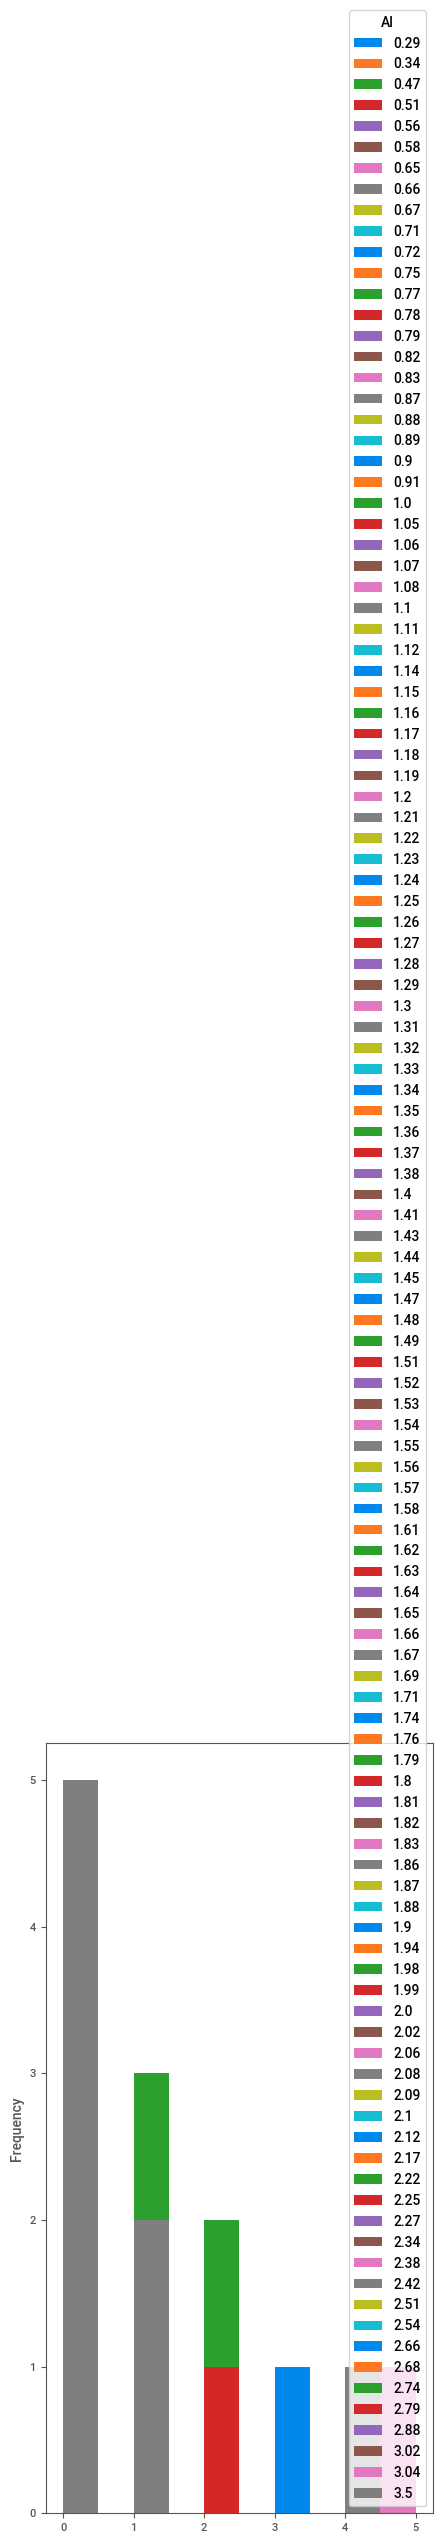

In [12]:
#here type has more Aluminium in the glass
pd.crosstab(glass.Type,glass.Al).plot(kind='hist',figsize=(5,10))
plt.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\2905352651.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.RI)


<AxesSubplot:xlabel='RI', ylabel='Density'>

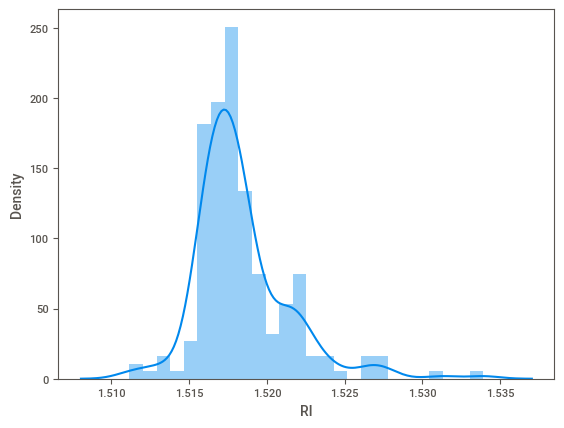

In [13]:
#this feature "RI" is normally distributed and  has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.RI)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\2494559459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Na)


<AxesSubplot:xlabel='Na', ylabel='Density'>

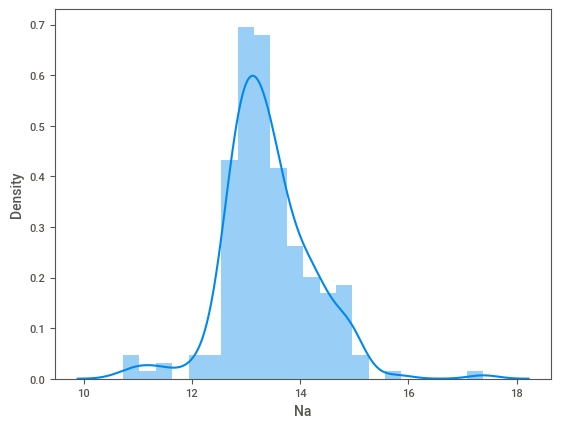

In [14]:
#this feature 'Na' is normally distributed and also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Na)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\3995302987.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Mg)


<AxesSubplot:xlabel='Mg', ylabel='Density'>

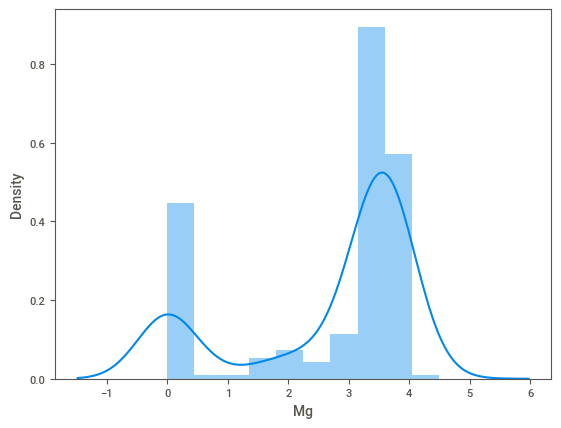

In [15]:
#this feature "Mg" is not normally distributed and also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Mg)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\2406215598.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Al)


<AxesSubplot:xlabel='Al', ylabel='Density'>

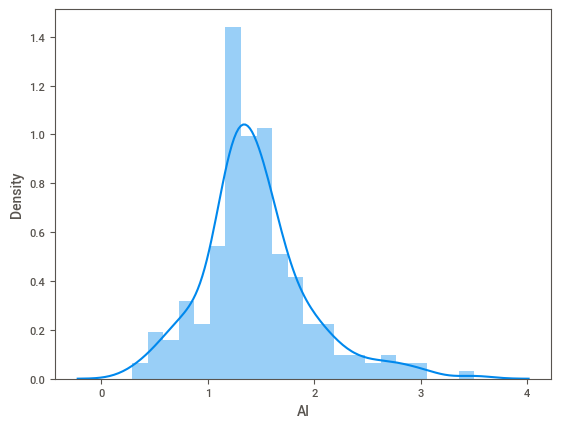

In [16]:
#this feature 'Al' also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Al)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\3955616596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Si)


<AxesSubplot:xlabel='Si', ylabel='Density'>

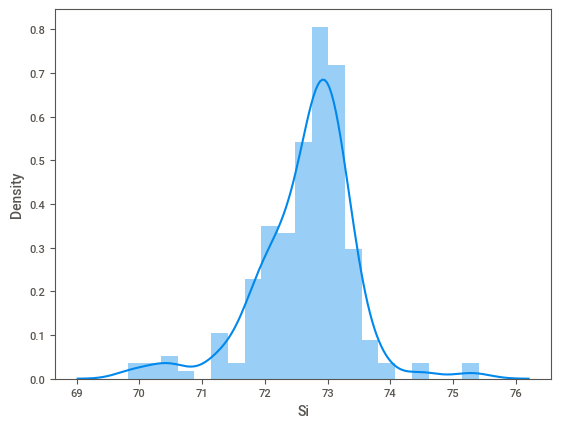

In [17]:
#this feature "Si" also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Si)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\436487193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.K)


<AxesSubplot:xlabel='K', ylabel='Density'>

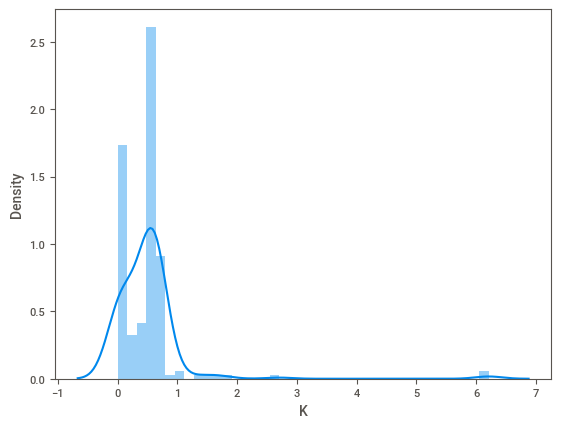

In [18]:
#We have outliers in K and this feature is not normally distributed
sns.distplot(glass.K)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\2488030881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Ca)


<AxesSubplot:xlabel='Ca', ylabel='Density'>

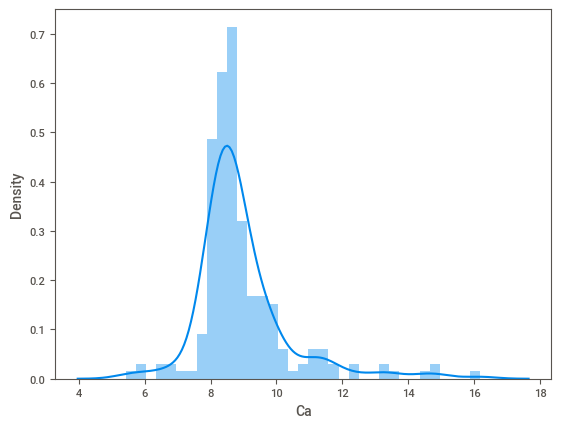

In [19]:
#this feature 'Ca' also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Ca)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\2434069966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Ba)


<AxesSubplot:xlabel='Ba', ylabel='Density'>

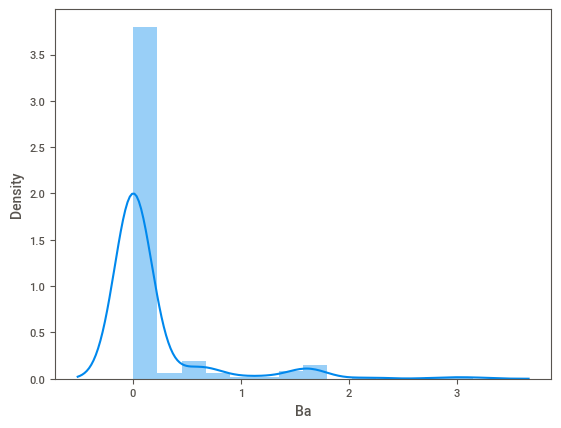

In [20]:
#this feature "Ba" also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Ba)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14344\1883037521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass.Fe)


<AxesSubplot:xlabel='Fe', ylabel='Density'>

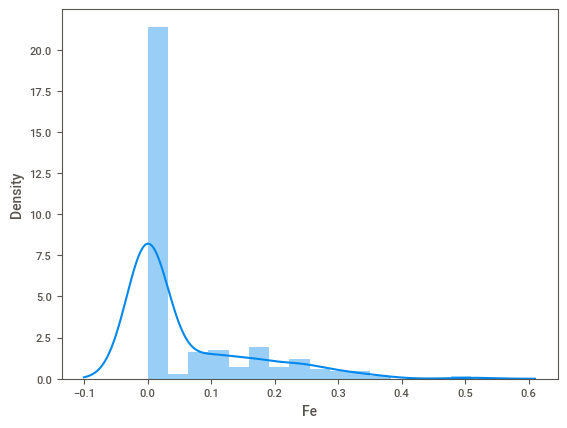

In [21]:
#this feature "Fe" also has outliers we can remove, replace ,retain  the outliers as per Domain Knowledge 
sns.distplot(glass.Fe)

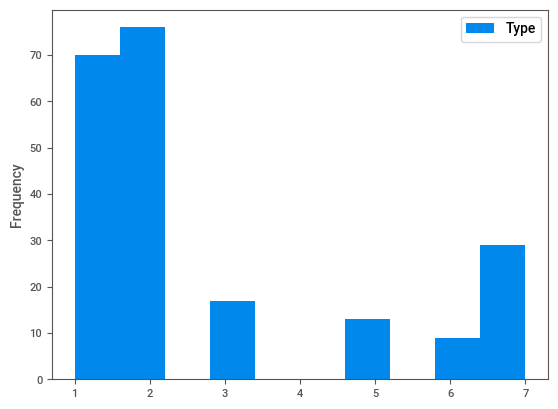

In [22]:
#plt.figure(figsize=(20,20))
glass.plot.hist(y='Type')
plt.legend()
plt.show()

# Model Creation using Grid Search CV to select best parameters

In [23]:
from sklearn.model_selection import GridSearchCV
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [24]:
model= KNeighborsClassifier(metric='manhattan')
grid= GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(norm_data,Y)

c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [25]:
print("Best Parameters=",grid.best_params_)
print("Best Accuracy=",grid.best_score_)

Best Parameters= {'n_neighbors': 5}
Best Accuracy= 0.6637873754152824


In [26]:
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(norm_data,Y,test_size=0.3,random_state=8)

# Model Validation

c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

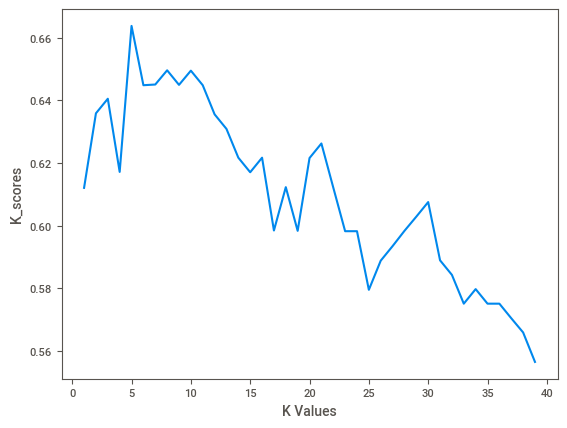

In [28]:
k_range = range(1,40)
k_scores=[]


for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k , metric='manhattan')
    scores= cross_val_score(knn,norm_data,Y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

    
plt.plot(k_range,k_scores)
plt.xlabel("K Values")
plt.ylabel("K_scores")
plt.show()


In [29]:
np.max(k_scores)

0.6637873754152824

In [30]:
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')                                                  

In [31]:
knn.fit(X_train,Y_train)

c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [32]:
y_pred=knn.predict(X_test)

In [33]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.85      0.67        20
           2       0.68      0.57      0.62        23
           3       1.00      0.17      0.29         6
           5       0.40      0.40      0.40         5
           6       0.00      0.00      0.00         2
           7       0.86      0.67      0.75         9

    accuracy                           0.60        65
   macro avg       0.58      0.44      0.45        65
weighted avg       0.65      0.60      0.59        65



In [34]:
accuracy_score(Y_test,y_pred)

0.6

# Model Validation using Kfold 

In [35]:
kfold=KFold(n_splits=30)

In [36]:
model1=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model1,X,Y,cv=kfold)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>    \n ACCURACY =",results.mean(),"<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>    
 ACCURACY = 0.5779761904761904 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 